<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [1]:
!pip install pooch

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


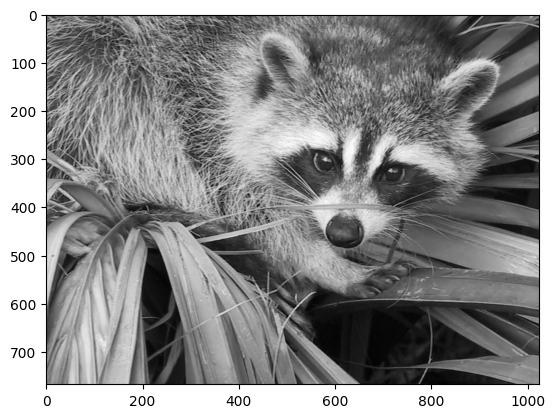

In [2]:
import matplotlib.pyplot as plt
from scipy import misc, datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [3]:
type(A)

numpy.ndarray

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [4]:
import numpy as np

def sse_score(X, X_hat):
    """
    Calcula el error SSE (Sum of Squared Errors) entre la matriz original y su aproximación.

    Parámetros:
    - X (np.array): Matriz original.
    - X_hat (np.array): Matriz reconstruida.

    Retorna:
    - float: Valor del error SSE.
    """
    return np.sum((X - X_hat) ** 2)

# Ejemplo de uso
X = np.array([[1, 2], [3, 4]])  # Matriz original
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])  # Aproximación de X

# Calcular el error SSE
sse = sse_score(X, X_hat)
print(f"Error SSE: {sse}")


Error SSE: 0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [ ]:
import numpy as np
from scipy.linalg import svd

def svd_m(X):
    # Realiza la descomposición en valores singulares
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Crear la matriz diagonal S de tamaño (m, n)
    S = np.diag(s) 
    
    # Si X tiene más filas que columnas, la matriz S debe tener las mismas filas que X
    if X.shape[0] > X.shape[1]:
        S = np.pad(S, ((0, X.shape[0] - X.shape[1]), (0, 0)), mode='constant')
    
    return U, S, Vt  

# Ejemplo de uso
X = np.array([[1, 2], [3, 4]])
U, S, Vt = svd_m(X)

# Imprimir los resultados
print("U:")
print(U)
print("\nS:")
print(S)
print("\nVt:")
print(Vt)


U:
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

S:
[[5.4649857  0.        ]
 [0.         0.36596619]]

Vt:
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [8]:
import numpy as np

def reconstruction(U, S, Vt):
    # Reconstrucción de la matriz X a partir de U, S y Vt
    return np.dot(U, np.dot(S, Vt))

# Matrices de ejemplo
U = np.array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
        [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
        [ 0.81741556, -0.57604844]])

# Reconstruir la matriz X_hat
X_hat = reconstruction(U, S, Vt)

# Mostrar la matriz reconstruida
print(X_hat)


[[0.99999999 1.99999998]
 [3.00000003 4.00000001]]


En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [9]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [15]:
def image_compression(A, n_comp):
    # Aplicar SVD
    U, S, Vt = svd_m(A)
    
    # Reducir dimensionalidad a n_comp componentes
    S_red =  S[0:n_comp, 0:n_comp]
    U_red = U[:, 0:n_comp]
    Vt_red = Vt[0:n_comp, :]
    
    # Reconstrucción de la imagen comprimida
    A_hat = reconstruction(U_red, S_red, Vt_red)
    
    # Calcular el error de reconstrucción
    sse = sse_score(A, A_hat)

    return A_hat, sse

# Cargar una imagen de ejemplo (en escala de grises)
racoon = datasets.face(gray=True)

# Comprimir la imagen con 50 componentes principales
racoon_hat, sse = image_compression(racoon, n_comp=50)

# Imprimir el error de reconstrucción
print("Error de reconstrucción (SSE):", sse)


Error de reconstrucción (SSE): 195489946.21017024


In [14]:
racoon_hat.shape

(768, 1024)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

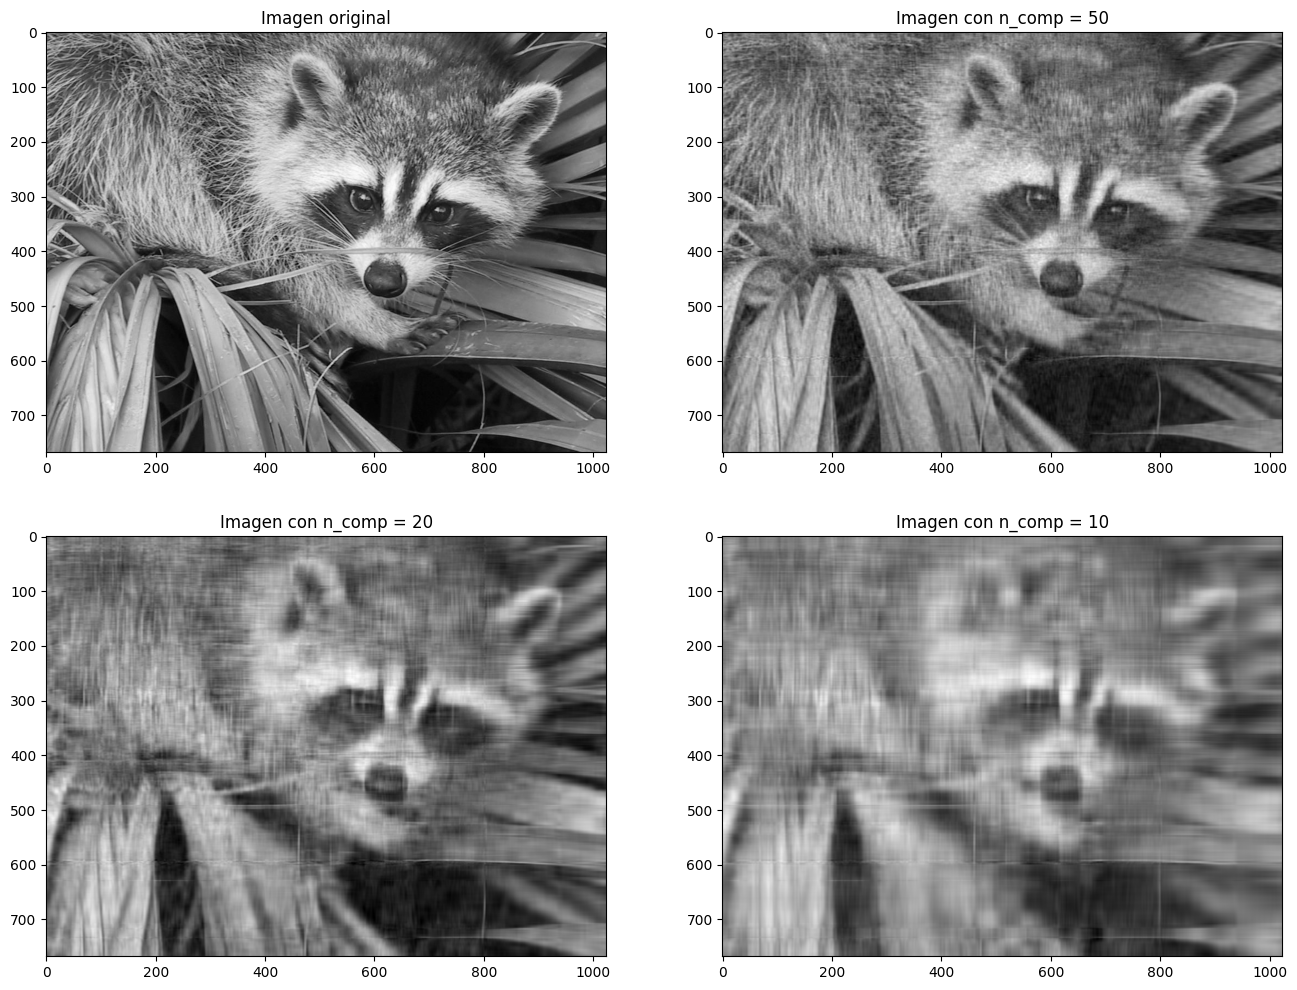

In [16]:
import matplotlib.pyplot as plt

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Mostrar la imagen original en el primer subgráfico
axes[0].imshow(A, cmap=plt.cm.gray)
axes[0].set_title('Imagen original')

# Componentes a probar
componentes = [50, 20, 10]

# Iterar sobre diferentes números de componentes para comprimir la imagen
for plot, comp in zip(range(1, 4), componentes):
    racoon_hat, _ = image_compression(racoon, n_comp=comp) # Comprimir imagen
    axes[plot].imshow(racoon_hat, cmap=plt.cm.gray)  # Mostrar imagen comprimida
    axes[plot].set_title('Imagen con n_comp = ' + str(comp))  # Título para cada subgráfico

# Mostrar la visualización
plt.show()
